<a href="https://colab.research.google.com/github/JcaHernandez99/Ploxpot/blob/main/Predecir_la_calidad_del_Vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# @title Cargar el archivo de Excel desde tu PC
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
wine_data = pd.read_excel(file_name)
print(wine_data.head())

Saving winequality-red.xlsx to winequality-red (5).xlsx
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9

In [43]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03,1599.000000
mean,8.319637,3.879687,0.270976,2.538806,0.087467,15.874922,46.467792,1257.356925,3.311113,0.658149,1.455285e+12,5.636023
std,1.741096,60.015370,0.194801,1.409928,0.047065,10.460157,32.895324,9784.883345,0.154386,0.169507,3.370300e+13,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000e+00,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000e+00,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,1.020000e+01,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,1.110000e+01,6.000000
max,15.900000,1185.000000,1.000000,15.500000,0.611000,72.000000,289.000000,100369.000000,4.010000,2.000000,9.566667e+14,8.000000


In [38]:
# @title Definir la variable objetivo y las variables predictoras
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir la variable objetivo y las variables predictoras
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Crear y entrenar el modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X, y)

# Evaluar el modelo con los valores del error cuadrático medio y R2
y_pred = lr_model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Error cuadrático medio:", mse)
print("R2:", r2)

Error cuadrático medio: 0.5114525898953206
R2: 0.2152753064368177


- El error cuadrático medio (MSE) es de 0.5114525898953206, lo que indica que el modelo no es muy preciso en la predicción de la calidad del vino.

- El coeficiente de determinación R2 es de 0.2152753064368177, lo que sugiere que solo un 21.53% de la variabilidad en la calidad del vino se explica mediante las variables predictoras.

In [45]:
# @title Clasificacion
wine_data['categorical_quality'] = np.where(wine_data['quality'] >= 6, 'good', 'regular')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categorical_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,regular
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,regular
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,regular
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,regular
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,regular


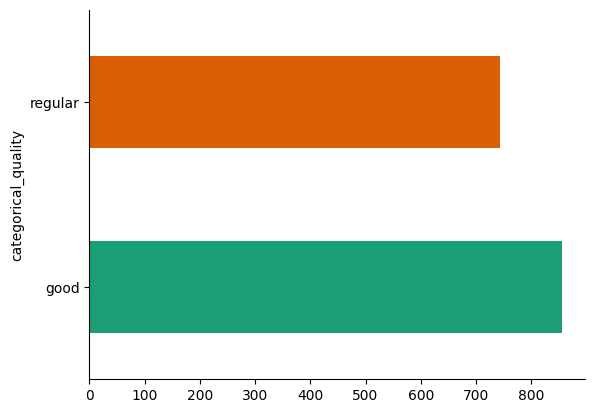

In [46]:
# @title categorical_quality

from matplotlib import pyplot as plt
import seaborn as sns
wine_data.groupby('categorical_quality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
# @title Particion con train_test_split
from sklearn.model_selection import train_test_split

X_logistic = wine_data.drop(['quality', 'categorical_quality'], axis=1)
y_logistic = wine_data['categorical_quality']

X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

In [41]:
# @title Regresion Logistica
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# @title Grado de precision
y_pred_logistic = logistic_model.predict(X_test)
accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.559375


- La precisión del modelo logístico es de 0.559375, lo que indica que el modelo es moderadamente preciso en la clasificación de la calidad del vino como buena o regular.

**Comparación de modelos**

En comparación, el modelo logístico parece ser más preciso que el modelo lineal en la predicción de la calidad del vino. Esto se debe a que la regresión logística es más adecuada para problemas de clasificación binaria, mientras que la regresión lineal es más adecuada para problemas de regresión continua.

In [53]:
# Validación cruzada
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, X, y, cv=5)
print("Scores:", scores)

Scores: [-8.17371132e-02  1.98092249e-01  2.13725762e-01  8.04989255e-02
 -8.87534055e+26]


* -8.17371132e-02: El primer valor indica que el modelo tuvo un error cuadrático medio (MSE) de aproximadamente -0.0817371132 en el primer conjunto de prueba.

* 1.98092249e-01: El segundo valor indica que el modelo tuvo un MSE de aproximadamente 0.198092249 en el segundo conjunto de prueba.

* 2.13725762e-01: El tercer valor indica que el modelo tuvo un MSE de aproximadamente 0.213725762 en el tercer conjunto de prueba.

* 8.04989255e-02: El cuarto valor indica que el modelo tuvo un MSE de aproximadamente 0.0804989255 en el cuarto conjunto de prueba.

* -8.87534055e+26: Este valor es sospechoso, ya que es un número muy grande y negativo. Esto puede indicar que hay un problema con los datos o con la implementación del modelo.

<ipython-input-50-2731b9aa903f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_data['quality'])


Text(0.5, 1.0, 'Distribución de la calidad del vino')

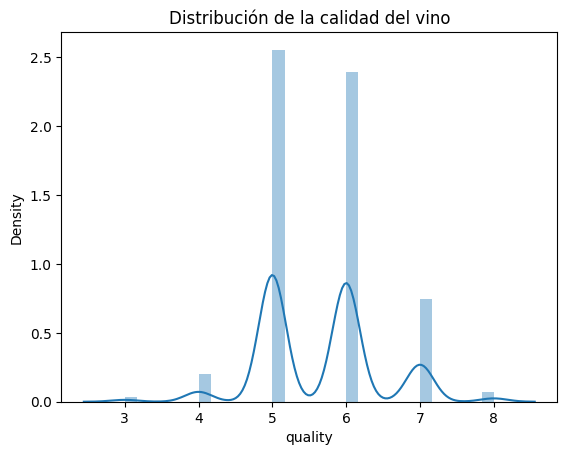

In [50]:
# Gráficos adicionales
sns.distplot(wine_data['quality'])
plt.title("Distribución de la calidad del vino")

In [51]:
# Comparación de modelos
from sklearn.metrics import accuracy_score, f1_score
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro')
print("Accuracy Logística:", accuracy_logistic)
print("F1-score Logística:", f1_logistic)

Accuracy Logística: 0.559375
F1-score Logística: 0.35871743486973945


- La accuracy logística es del 55.94%, lo que significa que el modelo acertó en aproximadamente la mitad de las predicciones.
- El F1-score logístico es bajo (0.3587), lo que sugiere que el modelo tiene dificultades para detectar los casos negativos ("regular") y puede requerir ajustes adicionales para mejorar su desempeño.